<a href="https://colab.research.google.com/github/nguyenquan0503/TensorFlow-2.0-tutorial/blob/master/Ex3_ConvNet_FashionClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Sử dụng Convolution Net để tăng độ chính xác của bài toán phân loại quần áo, giày dép.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Chuẩn bị dữ liệu

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_train: ", x_test.shape)
print("Shape of y_train: ", y_test.shape)

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of x_train:  (10000, 28, 28)
Shape of y_train:  (10000,)


## Model chỉ dùng Neural Network thông thường

In [7]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_data=(x_test, y_test)
                    )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4984 - accuracy: 0.8243 - val_loss: 0.4453 - val_accuracy: 0.8431
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8640 - val_loss: 0.3863 - val_accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy

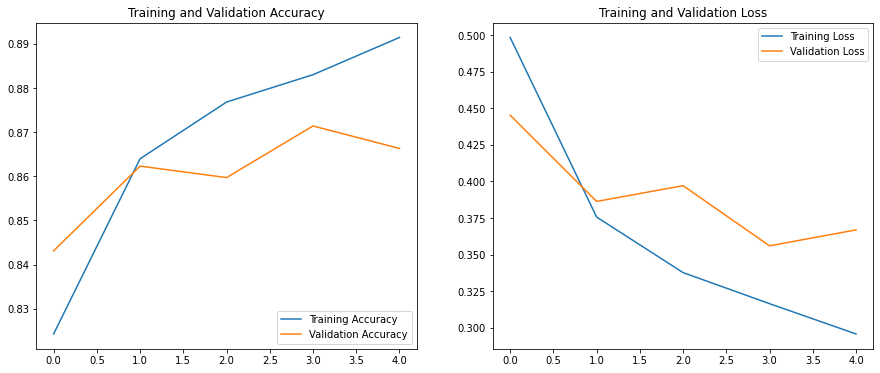

In [8]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Model dùng Convolutions

In [0]:
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

Tóm tắt model

In [10]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

Train model

In [11]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
history2 = model2.fit(x_train, y_train,
                    epochs=5,
                    validation_data=(x_test, y_test)
                    )

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4297 - accuracy: 0.8430 - val_loss: 0.3423 - val_accuracy: 0.8751
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2898 - accuracy: 0.8939 - val_loss: 0.2821 - val_accuracy: 0.8980
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2468 - accuracy: 0.9088 - val_loss: 0.2664 - val_accuracy: 0.9014
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2169 - accuracy: 0.9191 - val_loss: 0.2778 - val_accuracy: 0.8982
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1884 - accuracy: 0.9303 - val_loss: 0.2595 - val_accuracy: 0.9055


Visualization

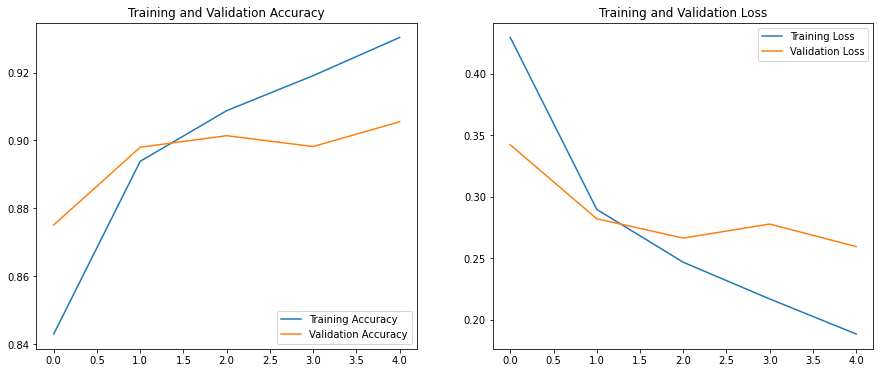

In [12]:
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Dùng Convolutions giúp tăng độ chính xác